# Project_App_Rating_Prediction

The problem is to identify the apps that are going to be good for Google to promote. Predict which apps will have high ratings.

In [50]:
# Load the data file using pandas. 

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

In [52]:
data=pd.read_csv('googleplaystore.csv')
print("File Imported Successfully")

File Imported Successfully


In [53]:
print(data) # prints only top 5 & bottom 5 rows 

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [56]:
data.shape

(10841, 13)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [58]:
# Check for null values in the data. Get the number of null values for each column.

In [59]:
data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [60]:
# null values for each column
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [61]:
# Drop records with nulls in any of the columns. 

In [62]:
data.dropna(inplace=True)

In [63]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [64]:
# Fixing Variables type and inconsistent formatting

In [65]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [66]:
#let's print our variables
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [67]:
# Extract the numeric value of the column
data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

In [68]:
# we define a function to will remove M, k, converts to float and mulitply by 1000, otherwise returns None

In [69]:
def change(Size): # this will remove M, convert to float and mulitply by 1000
    if 'M' in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k' in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:
        return None # it will make it none

In [70]:
data['Size']=data['Size'].map(change)

In [71]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [72]:
# we've got new null cuz of the function

In [73]:
data['Size'] 

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [74]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1637
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [75]:
# we have NaN- we need to fill it with a value
# we fill null values with zeros with 'ffill'

In [76]:
data.Size.fillna(method='ffill',inplace=True) # forward fill

In [77]:
data.isnull().sum() # All null entries are removed

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [78]:
# Reviews has an incorrect data type. Convert to a numeric field.

In [79]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [80]:
data['Reviews']=data['Reviews'].astype('int')

In [81]:
# let's check if the change  has been done, now it's an int32

In [82]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [83]:
# Installs field is currently stored as string and has values like 1,000,000+. 
# Treat 1,000,000+ as 1,000,000
# remove ‘+’, ‘,’ from the field, convert it to integer


In [84]:
data['Installs']=data['Installs'].str.replace('[+,]','')

C:\Users\KarimJabri\AppData\Local\Temp\ipykernel_2324\1241127784.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Installs']=data['Installs'].str.replace('[+,]','')


In [85]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [86]:
# install needs to be converted into integer
data['Installs']=data['Installs'].astype('int')

In [87]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [88]:
# Now Installs is int32

In [89]:
# remove the dollar sign from Price


In [90]:
data['Price']=data['Price'].str.replace('$','')

C:\Users\KarimJabri\AppData\Local\Temp\ipykernel_2324\1843015269.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price']=data['Price'].str.replace('$','')


In [91]:
data['Price']=data['Price'].astype('float')

In [92]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
#Now Price is float64

# Data Checks

In [30]:
# Check 1- Average rating should be between 1 and 5 as only these values 
# are allowed on the play store. 
# Drop the rows that have a value outside this range    

In [32]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
data['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9360, dtype: float64

In [93]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [97]:
# We could also use. No of rows where the condition is met
data[(data['Rating']>5) | (data['Rating']<1)].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [ ]:
# All values are between 1 and 5

In [ ]:
# Check2- Reviews should not be more than installs as only those who installed can review the app. 
# If there are any such records, drop them.

In [98]:
# let's check if we've got more reviews than installs
np.sum(data['Reviews'] > data['Installs'])

7

In [99]:
data['Reviews'].count()

9360

In [100]:
data[data['Reviews'] > data['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [101]:
# We have to drop 7 rows 
data.drop(data[data['Reviews'] > data['Installs']].index, inplace = True)

In [102]:
# let's check if they have been dropped
data['Reviews'].count()

9353

In [103]:
# we've dropped all 7 rows
np.sum(data['Reviews'] > data['Installs'])

0

In [ ]:
# Check 3- FREE PRICE should not be larger than zero

In [104]:
np.sum((data['Type'] =='Free') & (data['Price']!=0))

0

In [44]:
#No of cols where the condition is met
data[(data.Type=="Free") & (data.Price!=0)].sum()

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Genres            0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

In [105]:
# there no values

# Univariable Analysis

In [106]:
# let's describe the data
data.describe()

,Rating,Reviews,Size,Installs,Price
count,9353.000000,9.353000e+03,9353.000000,9.353000e+03,9353.000000
mean,4.191254,5.147606e+05,23147.924997,1.792215e+07,0.961467
std,0.515010,3.146169e+06,23252.056438,9.129920e+07,15.827539
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,5500.000000,1.000000e+04,0.000000
50%,4.300000,5.967000e+03,15000.000000,5.000000e+05,0.000000
75%,4.500000,8.174700e+04,33000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


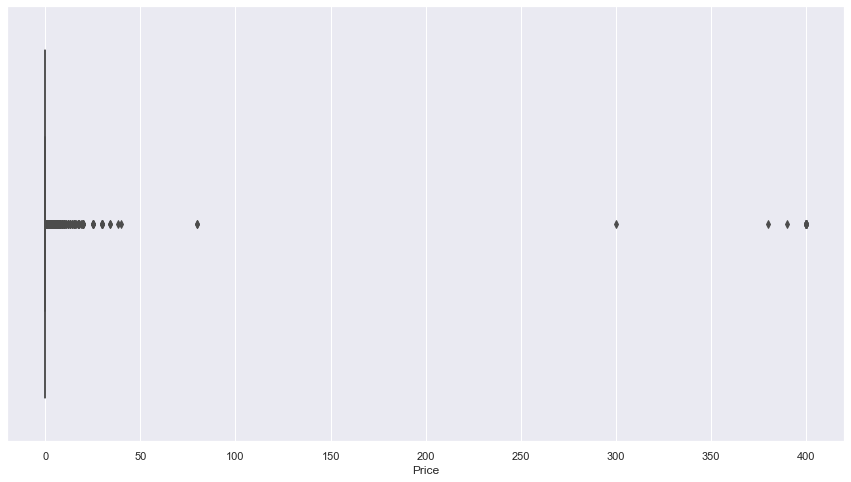

In [187]:
sns.boxplot(data.Price)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# we have many outliers. Some outliers seem suspitious especially those with a price of $300 and higher 

<AxesSubplot:xlabel='Reviews'>

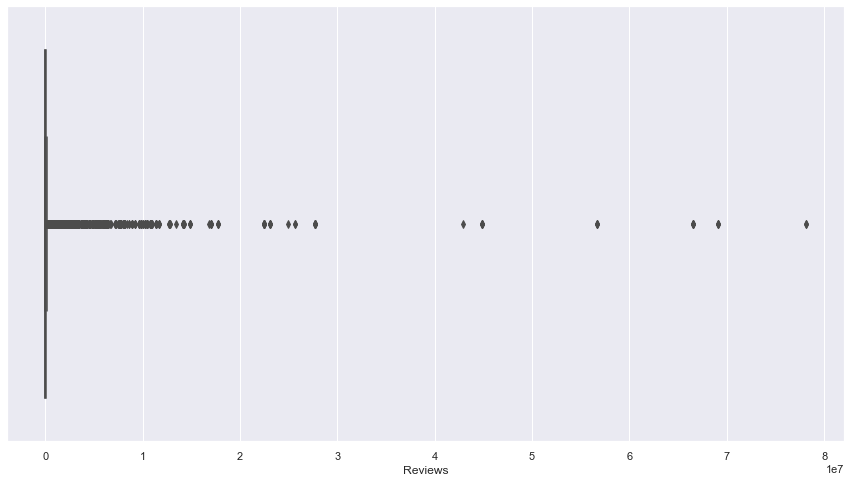

In [188]:
# Here we've got too many outliers as well which we will have to treat especiall those beyond the 2 million reviews
sns.boxplot(data.Reviews)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

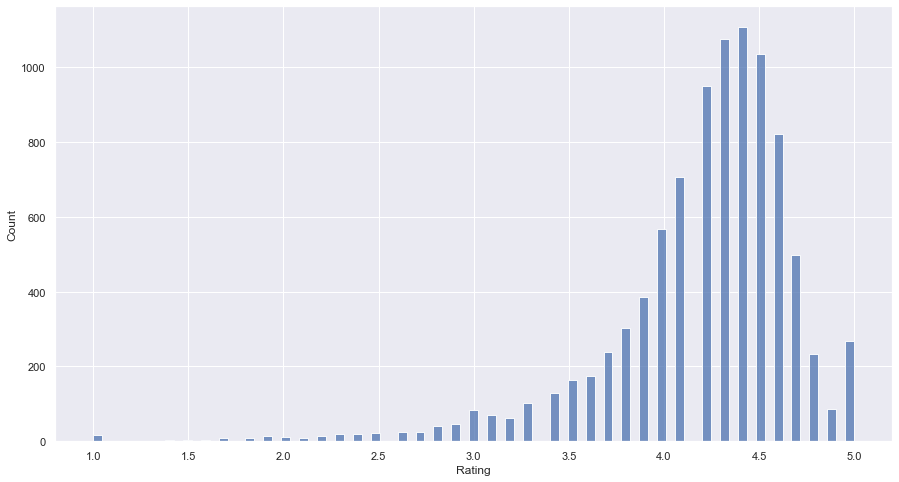

In [189]:
# Histogram for Rating
sns.histplot(data.Rating)

In [ ]:
# Ratings seem to follow a nomal dist with a left skew.  The number of rating is higher between 4.0 and 4.7 ratings

<AxesSubplot:xlabel='Size', ylabel='Count'>

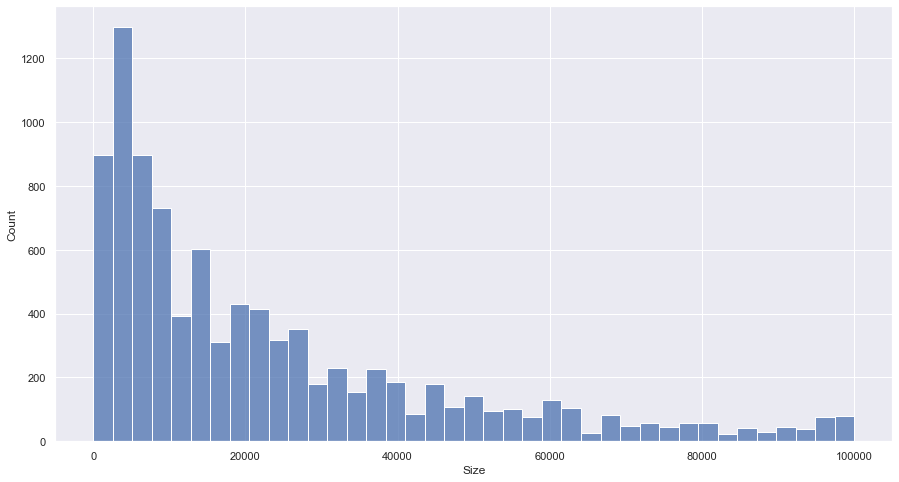

In [190]:
# Histogram for Size 
sns.histplot(data.Size)

In [44]:
# It resembles a Nor Dist with right skewness. We have a long tail which indicates the presence of outliers.

# Dealing with Outliers:


In [193]:
# Let's check the unique prices
data['Price'].sort_values().unique()

array([  0.  ,   0.99,   1.  ,   1.2 ,   1.29,   1.49,   1.5 ,   1.59,
         1.61,   1.7 ,   1.75,   1.76,   1.97,   1.99,   2.  ,   2.49,
         2.5 ,   2.56,   2.59,   2.9 ,   2.95,   2.99,   3.02,   3.04,
         3.08,   3.28,   3.49,   3.88,   3.9 ,   3.95,   3.99,   4.29,
         4.49,   4.59,   4.6 ,   4.77,   4.84,   4.99,   5.49,   5.99,
         6.49,   6.99,   7.49,   7.99,   8.49,   8.99,   9.  ,   9.99,
        10.  ,  10.99,  11.99,  12.99,  13.99,  14.  ,  14.99,  15.46,
        15.99,  16.99,  17.99,  18.99,  19.4 ,  19.99,  24.99,  29.99,
        33.99,  37.99,  39.99,  79.99, 299.99, 379.99, 389.99, 399.99,
       400.  ])

In [111]:
# We will drop records with a price of 200 or higher. 
data1=data[data.Price<200].copy()

In [112]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Drop records having more than 2 million reviews.

In [113]:
np.sum(data1['Reviews']>2000000)

453

In [114]:
data1.drop(data1[data1['Reviews'] >2000000].index, inplace=True)

In [115]:
# the outcome should be zero
np.sum(data1['Reviews']>2000000)

0

In [ ]:
# There seems to be some outliers in 'Installs'. we'll drop Apps having very high number of installs.

In [116]:
# Let's find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
data1['Installs'].quantile([0.1, 0.25,0.5,0.70,0.9,0.95,0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [117]:
# we'll make the cutoff on 95% and drop the rest
np.sum(data1['Installs'] >10000000)

389

In [118]:
data1.drop(data1[data1['Installs'] >10000000].index, inplace=True)

In [119]:
# the outcome should be zero
np.sum(data1['Installs'] >10000000)

0

# Bivariate analysis:

In [82]:
# assessment of the relations between rating and the other features

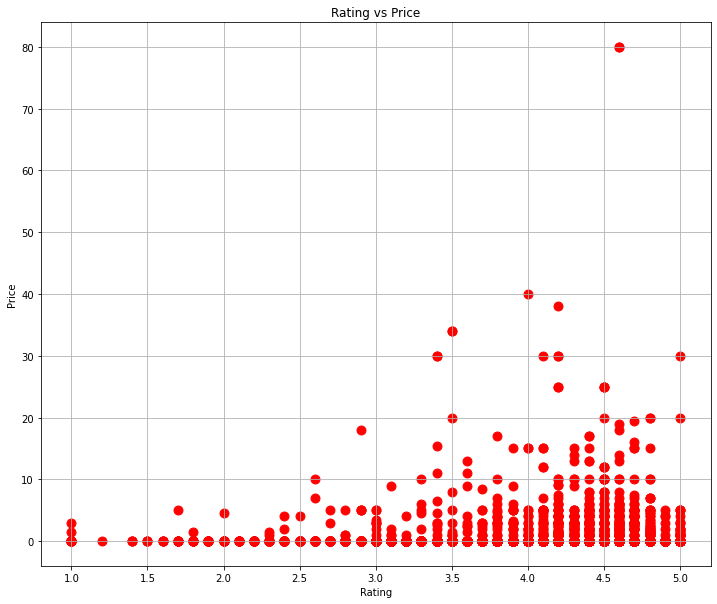

In [90]:
# Make scatter plot/joinplot for Rating vs. Price
plt.figure(figsize=[12,10])
plt.scatter(x=data1.Rating, y=data1.Price,s=80,color='r')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')
plt.grid()
plt.show()

In [ ]:
# The rating seem to slighly increase with the price, Although most high rating fall within prices between $0-$10

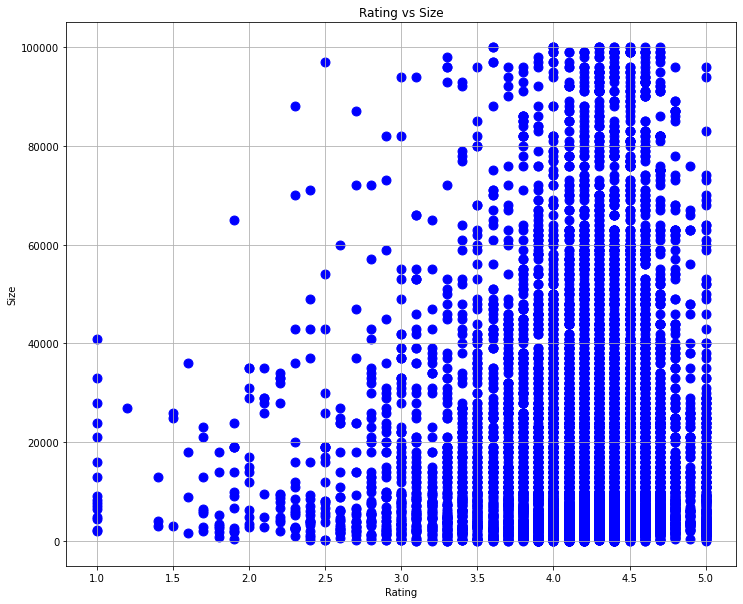

In [121]:
# Make scatter plot/joinplot for Rating vs. Size
plt.figure(figsize=[12,10])
plt.scatter(x=data1.Rating, y=data1.Size,s=80,color='b')
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating vs Size')
plt.grid()
plt.show()

In [ ]:
# Interestingly, heavier apps seem to be better rated .

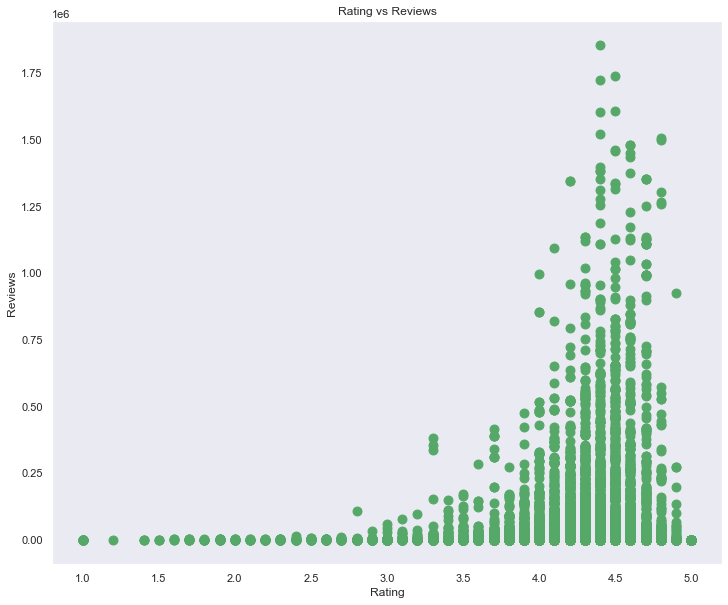

In [197]:
# Make scatter plot/joinplot for Rating vs. Reviews
plt.figure(figsize=[12,10])
plt.scatter(x=data1.Rating, y=data1.Reviews,s=80,color='g')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating vs Reviews')
plt.grid()
plt.show()

In [ ]:
# There is a relationship between the Rating and the number if reviews. High rated Apps had the most reviews

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

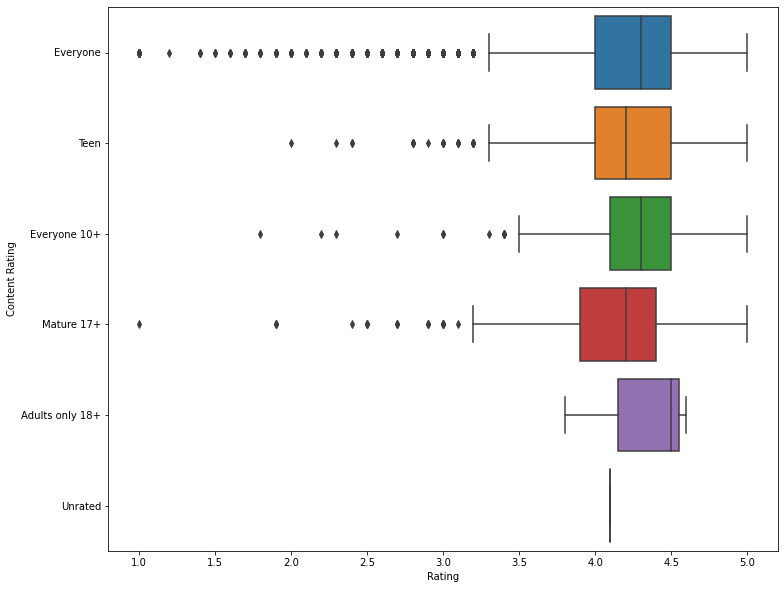

In [123]:
# Make boxplot for Rating vs. Content Rating
plt.figure(figsize=[12,10])
sns.boxplot(x = 'Rating', y = 'Content Rating', data = data1)

In [ ]:
# Apps with 'Adults only 18+' seem to have higher rating than the rest.


<AxesSubplot:xlabel='Rating', ylabel='Category'>

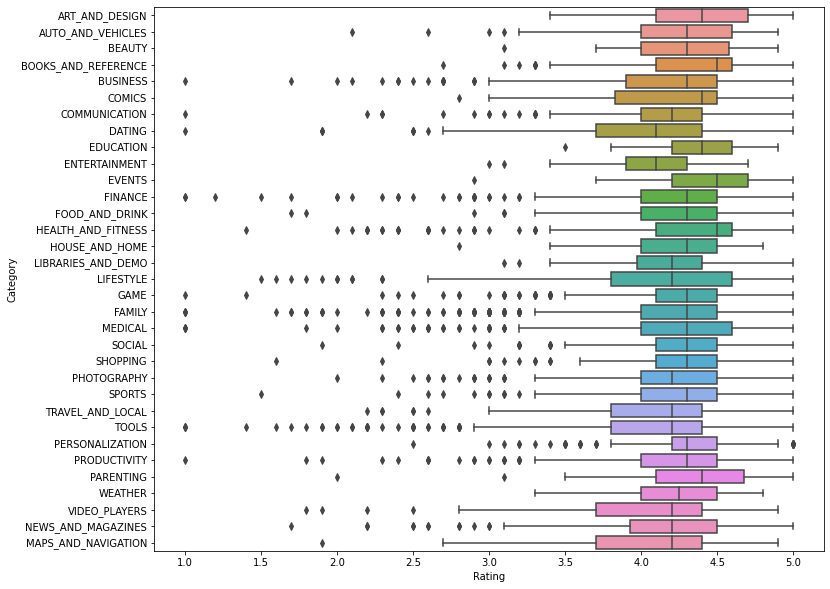

In [124]:
# Make boxplot for Ratings vs. Category
plt.figure(figsize=[12,10])
sns.boxplot(x = 'Rating', y = 'Category', data = data1)

In [125]:
# Generes such Art&Design, Parenting,Entertainment seem to be better rated than the rest

# Data preprocessing:

In [126]:
inp1=data1.copy()

In [127]:
# Apply log transformation (np.log1p) to Reviews and Installs.
inp1['Reviews']=np.log1p(inp1['Reviews'])
inp1['Installs']=np.log1p(inp1['Installs'])

In [128]:
# Reviews before the log function
data1['Installs']

0           10000
1          500000
2         5000000
4          100000
5           50000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8496, dtype: int32

In [129]:
# Reviews after the log function
inp1['Installs']

0         9.210440
1        13.122365
2        15.424949
4        11.512935
5        10.819798
           ...    
10834     6.216606
10836     8.517393
10837     4.615121
10839     6.908755
10840    16.118096
Name: Installs, Length: 8496, dtype: float64

In [130]:
# Reviews before the log function
data1['Reviews']

0           159
1           967
2         87510
4           967
5           167
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8496, dtype: int32

In [98]:
# Reviews after the log function
inp1['Reviews']

0         5.075174
1         6.875232
2        11.379520
4         6.875232
5         5.123964
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8496, dtype: float64

In [131]:
# Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1).copy() 

In [132]:
data1.shape

(8496, 13)

In [133]:
# four cols have been removed
inp1.shape

(8496, 9)

In [155]:
# Name of dataframe should be inp2.
inp2=inp1.copy()

In [156]:
inp2.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [157]:
# Get dummy columns for Category, Genres, and Content Rating and Type
inp2=pd.get_dummies(inp2, columns = ['Category', 'Genres', 'Content Rating', 'Type'])

In [158]:
inp2.shape

(8496, 161)

In [159]:
# Train test split  and apply 70-30 split.Name the new dataframes df_train and df_test.
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(inp2,test_size=0.3,random_state=5)

In [160]:
df_train.shape

(5947, 161)

In [161]:
df_test.shape

(2549, 161)

In [162]:
#  Separate the dataframes into X_train, y_train, X_test, and y_test.
y_train=df_train.pop('Rating') 
x_train=df_train

In [163]:
x_train
y_train

9788    4.7
786     4.4
8880    4.6
1839    4.6
2105    4.2
       ... 
9223    3.5
3727    4.3
5024    4.4
2736    4.1
3568    4.1
Name: Rating, Length: 5947, dtype: float64

In [164]:
y_test=df_test.pop('Rating')
x_test=df_test

In [165]:
x_test
y_test

10720    4.4
8766     4.4
601      3.9
5018     3.9
2365     4.6
        ... 
10440    4.5
4195     4.2
6206     4.3
9114     4.2
8897     4.6
Name: Rating, Length: 2549, dtype: float64

#  Model building:

In [166]:
# Use linear regression
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression() # object


In [167]:
inp2.dtypes

Rating                       float64
Reviews                      float64
Size                         float64
Installs                     float64
Price                        float64
                              ...   
Content Rating_Mature 17+      uint8
Content Rating_Teen            uint8
Content Rating_Unrated         uint8
Type_Free                      uint8
Type_Paid                      uint8
Length: 161, dtype: object

In [173]:
# Give training
linear_reg.fit(x_train,y_train)

LinearRegression()

In [174]:
#let's define a variable y for predictions
y_pred=linear_reg.predict(x_test)

In [178]:
# Report the R2 on the train set
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.14322233174531762


In [ ]:
# This model an R2 of 0.14 which is quite low.

In [ ]:
# Make predictions on test set and report R2.

In [179]:
# Predictions:
y_pred


array([4.26731424, 4.27789971, 3.90023863, ..., 4.25135455, 4.17522884,
       4.30809792])